# Bitwise operations

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def imshow(img):
    plt.figure(figsize = (20,15));
    plt.imshow(img[:,:,::-1]);

In [95]:
# With numpy create a black canvas of size 800 x 800 
img = np.zeros([800,800], dtype="uint8", )
img[:] = 0

In [96]:
img.shape

(800, 800)

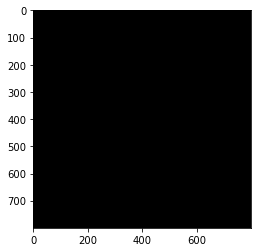

In [106]:
plt.imshow(img, cmap='Greys_r')

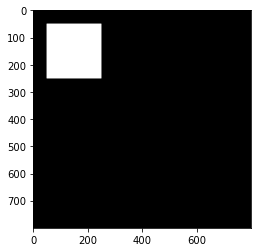

In [107]:
# Make a copy of the canvas and draw a white square of size 250 x 250 on top of the copy of the canvas
square = img.copy()
cv2.rectangle(square,(50, 50), (250, 250), 255, -1)
plt.imshow(square, cmap='Greys_r')



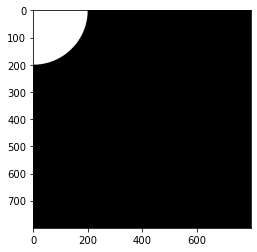

In [108]:
# Make a copy of the origina lcanvas and draw a white circle of size 200 x 200 on top of the copy of the canvas
# Make sure the circle is in a different position of the canvas than the square
circle = img.copy()
cv2.circle(circle,(0, 0), 200, 255, -1)
plt.imshow(circle, cmap='Greys_r')

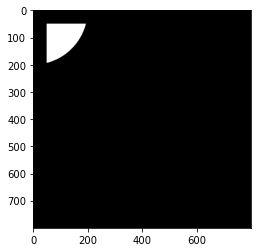

In [109]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation
mergeand = cv2.bitwise_and(square, circle)
plt.imshow(mergeand, cmap='gray')

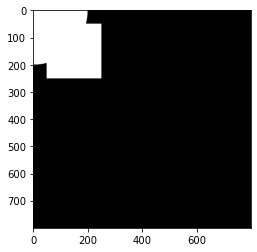

In [110]:
# Create a new image and merge both previous images (square and circle) with a bitwise or operation
mergeor = cv2.bitwise_or(square, circle)
plt.imshow(mergeor, cmap='gray')

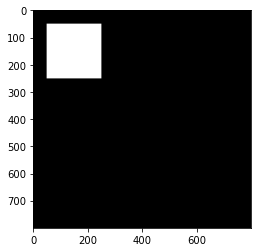

In [117]:
# Create a new image and merge both previous images (square and circle) with a bitwise not operation
mergenot = cv2.bitwise_not(circle, square)
plt.imshow(mergenot, cmap='gray')

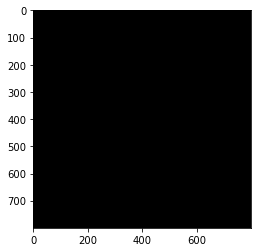

In [131]:
# Create a new image and merge both previous images (square and circle) with a bitwise xor operation
mergexor = cv2.bitwise_xor(circle, square)
plt.imshow(mergexor, cmap='gray')

<Figure size 1440x1080 with 0 Axes>

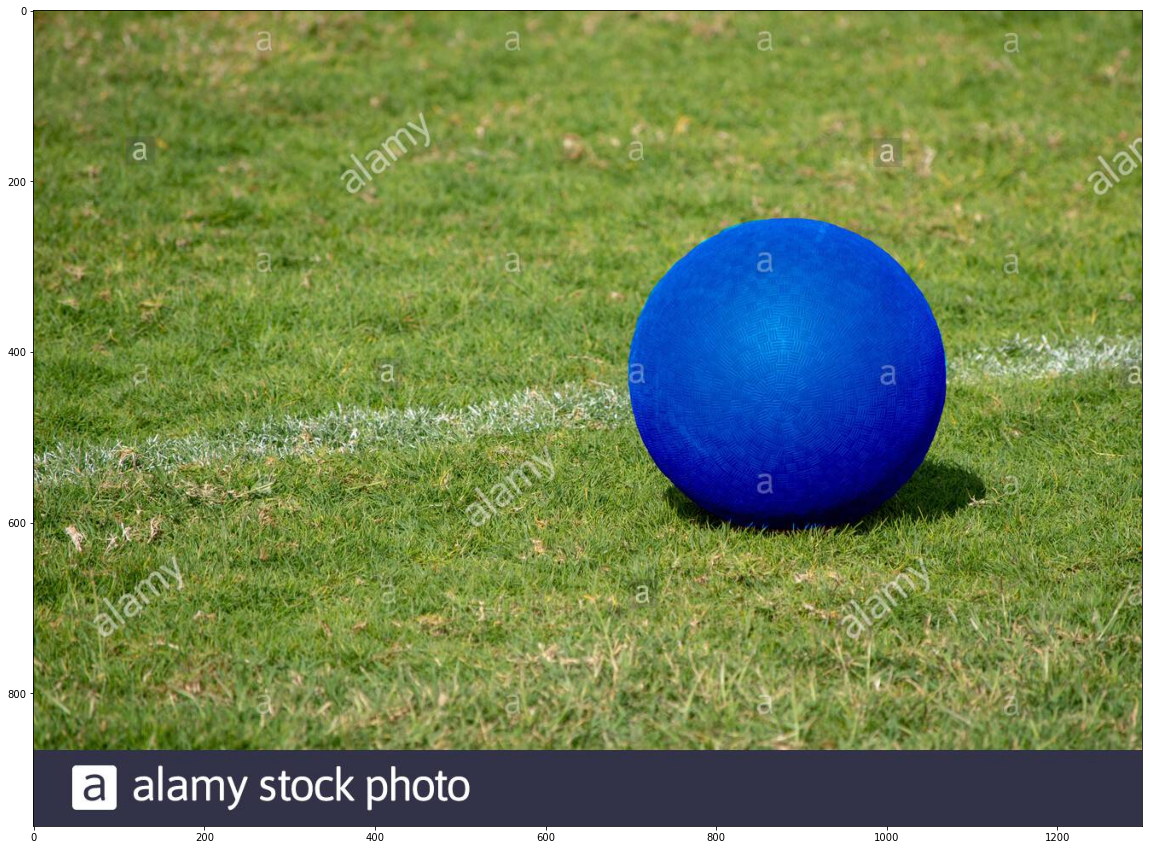

In [369]:
# Load a color image and convert it to HSV
# Identify a prominent color from the image and filter it out
# Create a mask for that color and apply a bitwise and specifying the mask to show only this part of the image

cimg = cv2.imread('img/ball.jpg')
plt.figure(figsize = (20,15));

#plt.imshow(cv2.cvtColor(cimg,cv2.COLOR_BGR2RGB));
imshow(cimg)

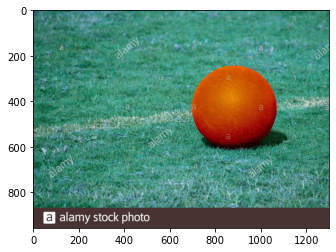

In [370]:
plt.imshow(cimg)

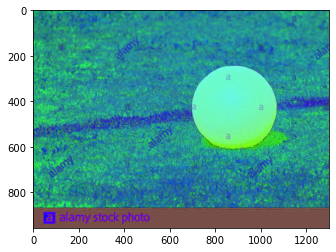

In [371]:
HSV = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(HSV)

plt.imshow(HSV)

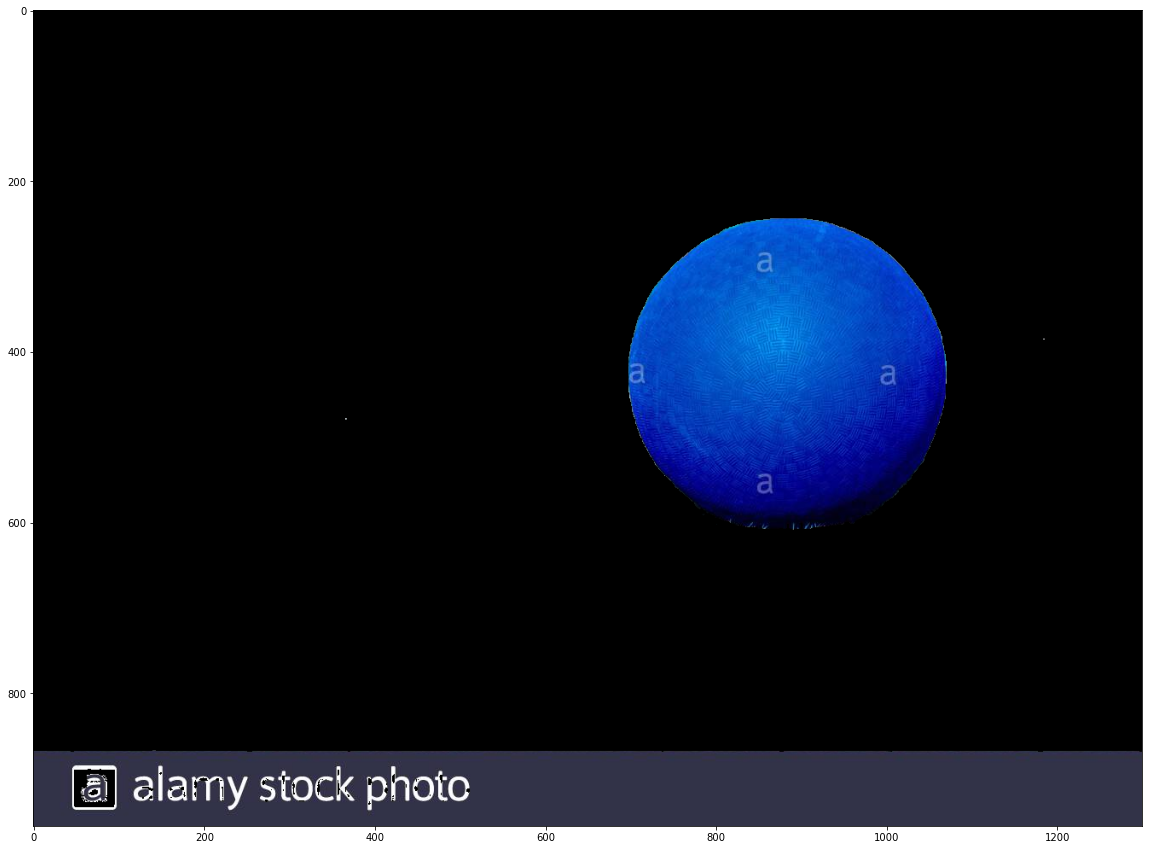

In [372]:
lower_range = (90, 0, 0)
upper_range = (140, 255, 255)

mask = cv2.inRange(HSV, lower_range, upper_range)

masked_cimg = cimg.copy()

masked_cimg[mask==0] = [0,0,0]

imshow(masked_cimg)

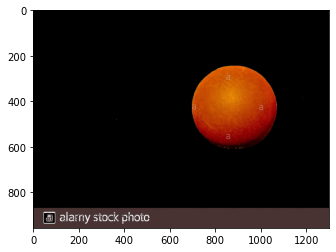

In [373]:
bitwand = cv2.bitwise_and(cimg, cimg, mask=mask)
plt.imshow(bitwand)

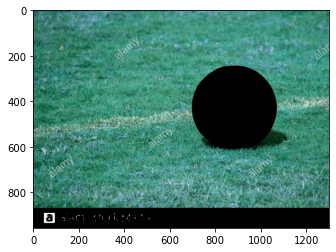

In [383]:
# With the same image and mask you have created above now apply a bitwise not specifying the mask 
# to show everything but the color you masked out before

mask1 = cv2.bitwise_not(mask)
bitwand = cv2.bitwise_and(cimg, cimg, mask=mask1)
plt.imshow(bitwand)

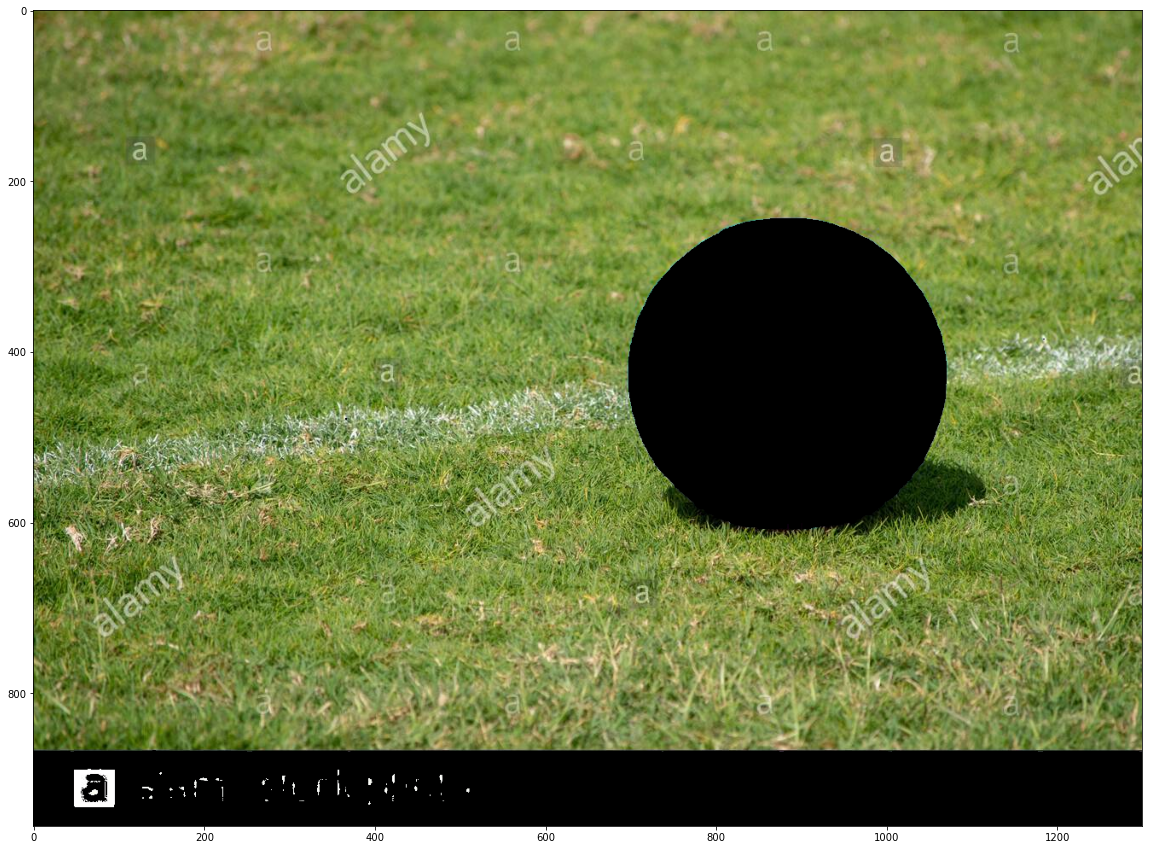

In [385]:
imshow(bitwand)

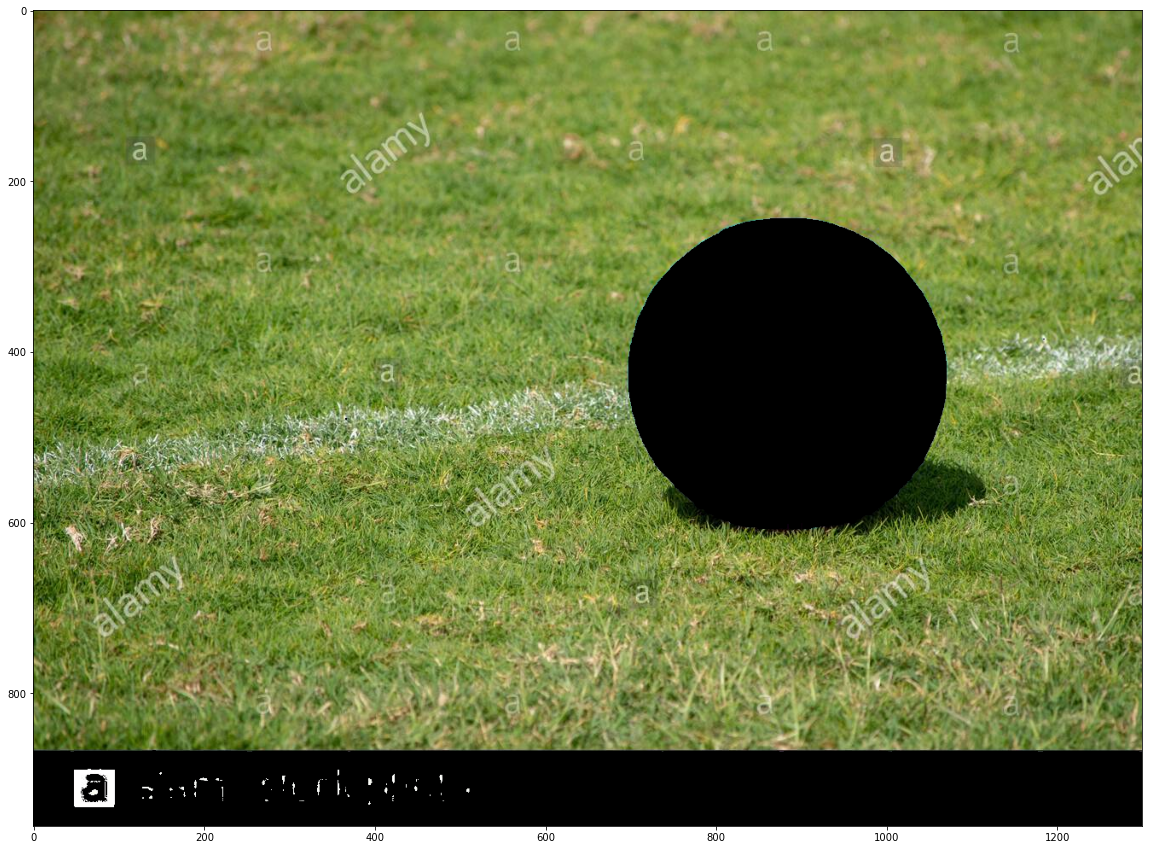

In [377]:
bitwxor= cv2.bitwise_xor(cimg,masked_cimg)
imshow(bitwxor)